In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

## Histogram

- 이미지의 밝기의 분포를 그래프로 표현한 방식

- 이미지의 전체의 밝기 분포와 채도(밝고 어두움)을 알 수 있음

<img src="https://opencv-python.readthedocs.io/en/latest/_images/image013.jpg">

<sub>[이미지 출처] https://www.cambridgeincolour.com/tutorials/histograms1.htm</sub>

<br>

## 용어 설명

- BINS 
  
  - 히스토그램 그래프의 X축의 간격  
    위 그림의 경우에는 0 ~ 255를 표현하였기 때문에 BINS값은 256이 된다.  
    BINS값이 16이면 0 ~ 15, 16 ~ 31..., 240 ~ 255와 같이 X축이 16개로 표현  
    OpenCV에서는 BINS를 histSize 라고 표현

- DIMS 

  - 이미지에서 조사하고자하는 값을 의미  
    빛의 강도를 조사할 것인지, RGB값을 조사할 것인지를 결정

- RANGE 

  - 측정하고자하는 값의 범위  

<br>

- `cv2.calcHist()`

  - Parameters
    - `image` : 분석대상 이미지(uint8 or float32 type). Array형태.

    - `channels` : 분석 채널(X축의 대상)
    
      - 이미지가 graysacle이면 [0], color 이미지이면 [0],[0,1] 형태(1 : Blue, 2: Green, 3: Red)

    - `mask` : 이미지의 분석영역. None이면 전체 영역.

    - `histSize` : BINS 값. [256]

    - `ranges` : Range값. [0,256]


In [2]:
img1 = cv2.imread('./flowers1.jpg', 0)
img2 = cv2.imread('./flowers2.jpg', 0)

In [3]:
hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])

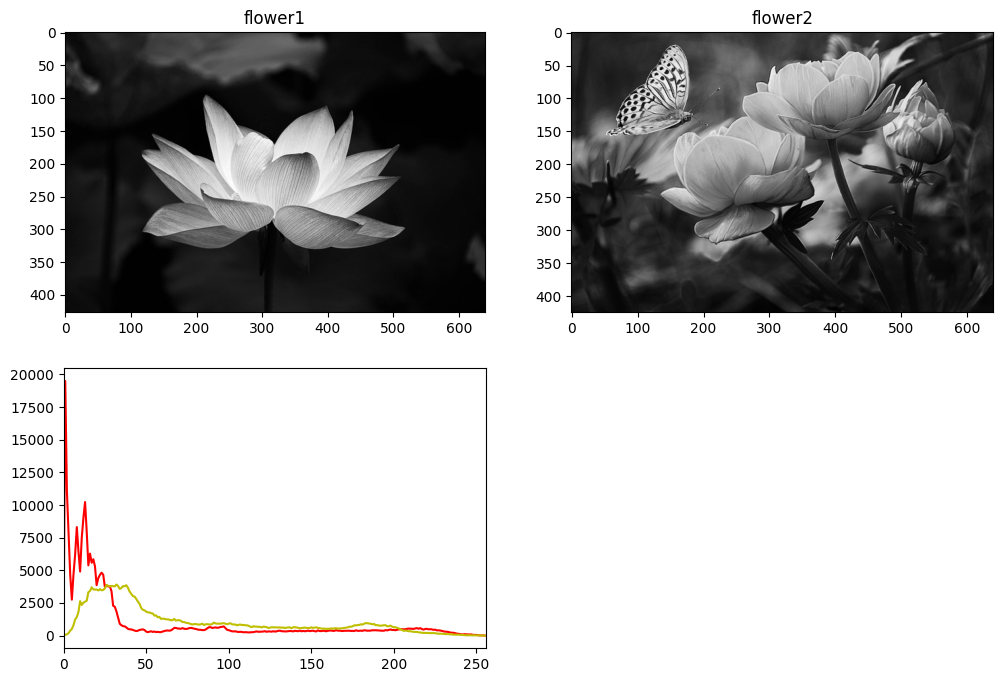

In [4]:
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.imshow(img1, 'gray')
plt.title('flower1')

plt.subplot(2, 2, 2)
plt.imshow(img2, 'gray')
plt.title('flower2')

plt.subplot(2, 2, 3)
plt.plot(hist1, color='r')
plt.plot(hist2, color='y')
plt.xlim([0, 256])

plt.show()

## Mask를 적용한 히스토그램

In [5]:
img = cv2.imread('./cat.jpg')
img.shape

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[180: 400, 260:600] = 255

In [7]:
masked_img = cv2.bitwise_and(img, img, mask=mask)

In [8]:
hist_full = cv2.calcHist([img], [1], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [1], mask, [256], [0, 256])

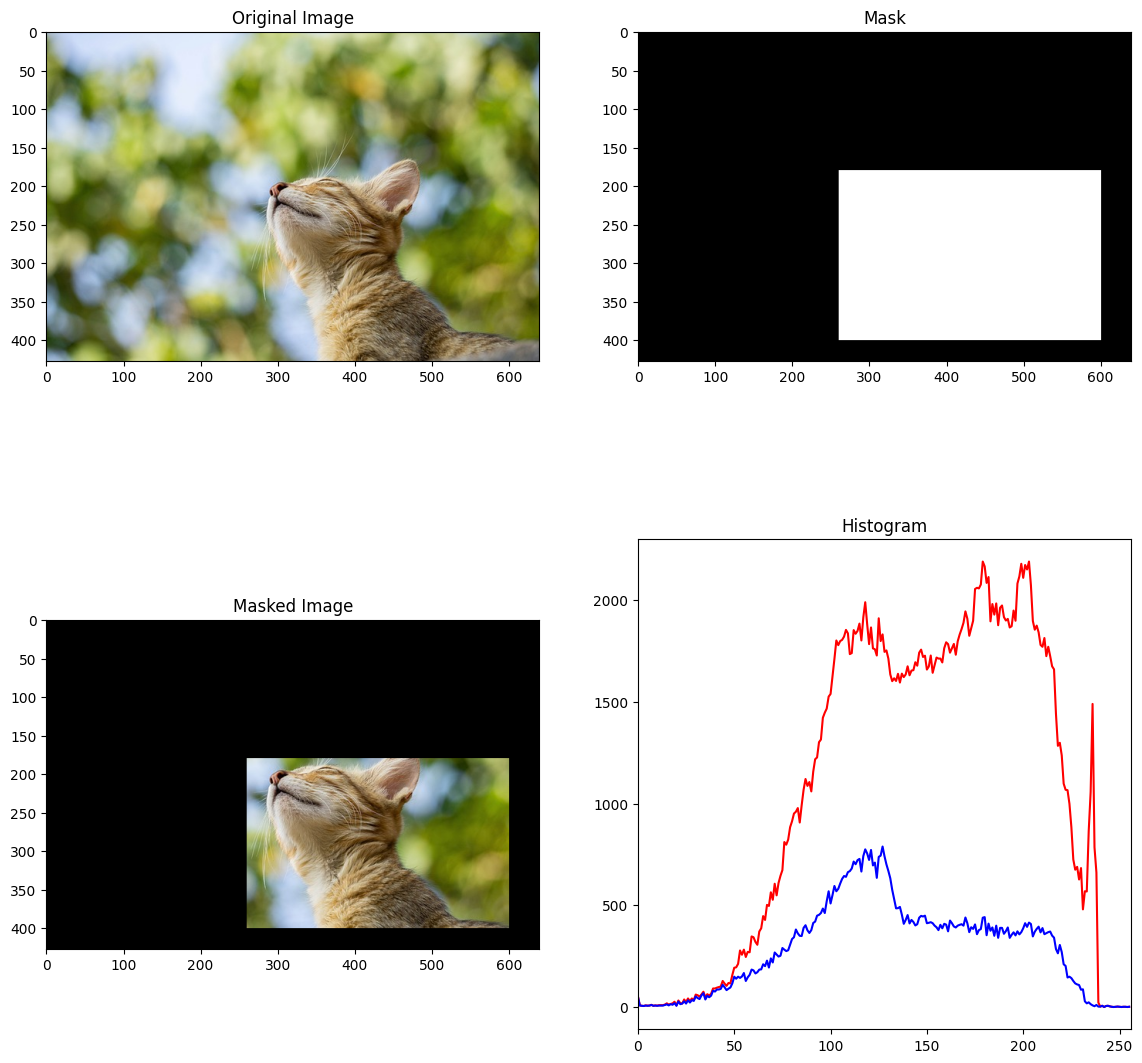

In [9]:
plt.figure(figsize=(14, 14))
plt.subplot(221)
plt.imshow(img, 'gray')
plt.title('Original Image')

plt.subplot(222)
plt.imshow(mask, 'gray')
plt.title('Mask')

plt.subplot(223)
plt.imshow(masked_img, 'gray')
plt.title('Masked Image')

plt.subplot(224)
plt.title('Histogram')
plt.plot(hist_full, color='r')
plt.plot(hist_mask, color='b')
plt.xlim([0, 256])

plt.show()

## 히스토그램 평탄화

- 이미지의 히스토그램이 특정영역에 너무 집중되어 있으면 contrast가 낮아 좋은 이미지라고 할 수 없음

- 전체 영역에 골고루 분포가 되어 있을 때 좋은 이미지라고 할 수 있는데, 아래 히스토그램을 보면 좌측 처럼 특정 영역에 집중되어 있는 분포를 오른쪽 처럼 골고루 분포하도록 하는 작업을 Histogram Equalization 이라고 함

- (참고) 이론적인 방법

  - 이미지의 각 픽셀의 cumulative distribution function(cdf)값을 구하고 Histogram Equalization 공식에 대입하여 0 ~ 255 사이의 값으로 변환

  - 이렇게 새롭게 구해진 값으로 이미지를 표현하면 균일화된 이미지를 얻을 수 있음

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Histogrammeinebnung.png/600px-Histogrammeinebnung.png">

  <sub>[이미지 출처] https://en.wikipedia.org/wiki/Histogram_equalization</sub>

In [10]:
img = cv2.imread('./city.jpg', 0)
img.shape

(427, 640)

In [11]:
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

In [12]:
cdf = hist.cumsum()

cdf_m = np.ma.masked_equal(cdf, 0)

In [13]:
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())

cdf = np.ma.filled(cdf_m, 0).astype('uint8')

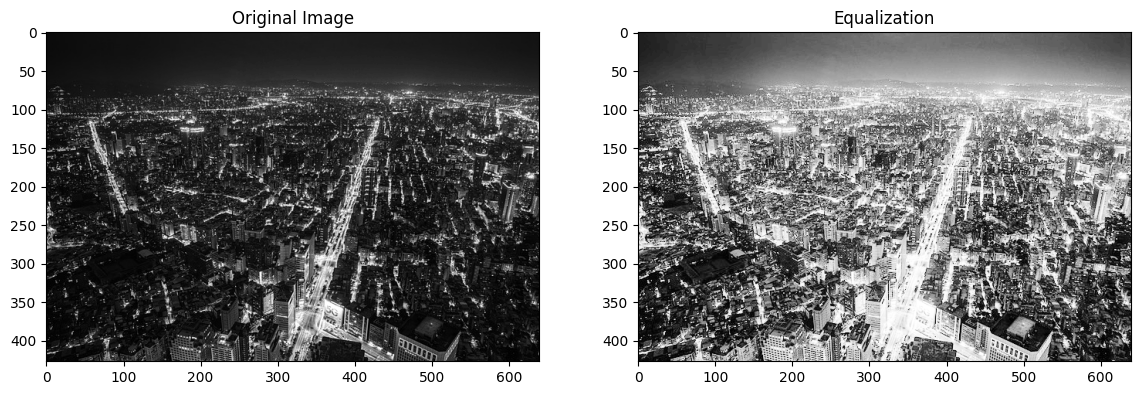

In [14]:
img2 = cdf[img]

plt.figure(figsize=(14, 10))
plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(img2, 'gray')
plt.title('Equalization')

plt.show()

- OpenCV 함수로 간단하게 처리

In [18]:
img = cv2.imread('./city.jpg', 0)

In [19]:
img2 = cv2.equalizeHist(img)

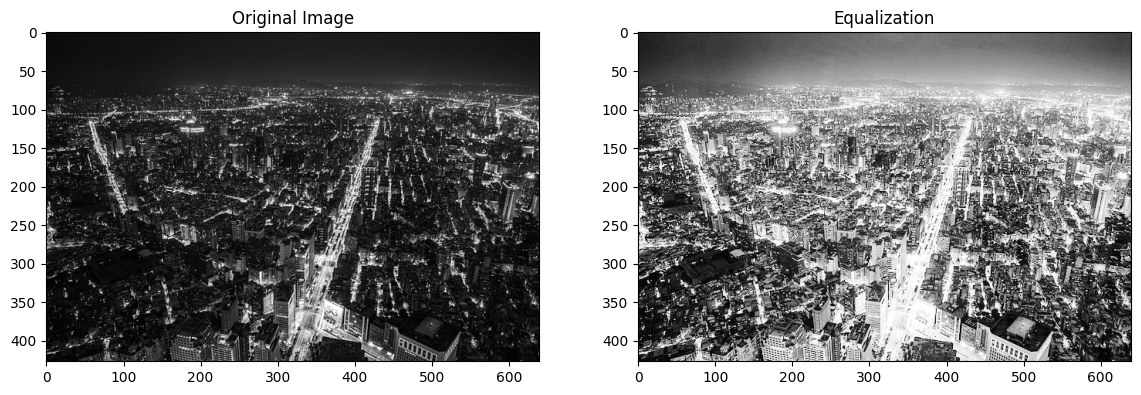

In [20]:
plt.figure(figsize=(14, 10))
plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(img2, 'gray')
plt.title('Equalization')

plt.show()

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

- 지금까지의 처리는 이미지의 전체적인 부분에 균일화를 적용

- 하지만 일반적인 이미지는 밝은 부분과 어두운 부분이 섞여 있기 때문에 전체에 적용하는 것은 그렇게 유용하지 않음
  

In [22]:
img = cv2.imread('./keyboard.jpg', 0)
img.shape

(360, 640)

In [23]:
img2 = cv2.equalizeHist(img)

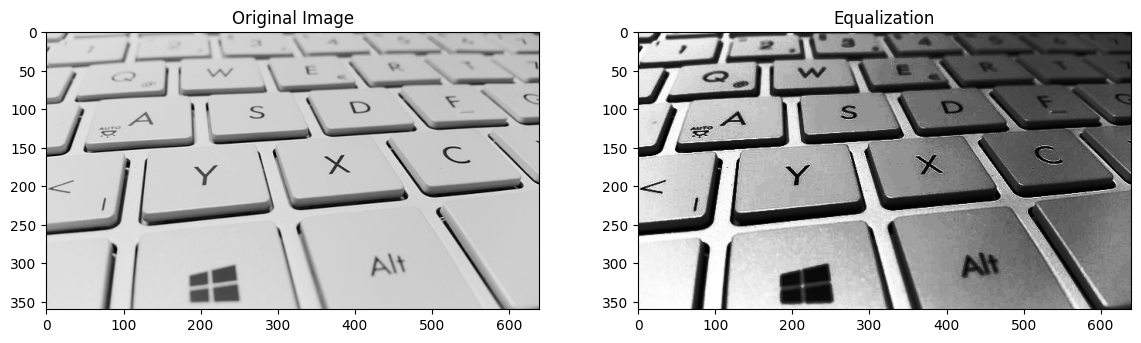

In [24]:
plt.figure(figsize=(14, 10))
plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(img2, 'gray')
plt.title('Equalization')

plt.show()

- 위 결과에서 주변의 어두운 부분은 균일화가 적용되어 밝아졌지만, 가운데 이미지는 너무 밝아져 경계선을 알아볼 수 없게 되어버림

- 이 문제를 해결하기 위해서 `adaptive histogram equalization`을 적용하게 됨
  - 즉, 이미지를 작은 title형태로 나누어 그 title안에서 Equalization을 적용하는 방식
  
  - 작은 영역이다 보니 작은 노이즈(극단적으로 어둡거나, 밝은 영역)가 있으면 이것이 반영이 되어 원하는 결과를 얻을 수 없게 됨
  
  - 이 문제를 피하기 위해서 `contrast limit`라는 값을 적용하여 이 값을 넘어가는 경우는 그 영역은 다른 영역에 균일하게 배분하여 적용

In [30]:
img = cv2.imread('./keyboard.jpg', 0)

In [31]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img2 = clahe.apply(img)

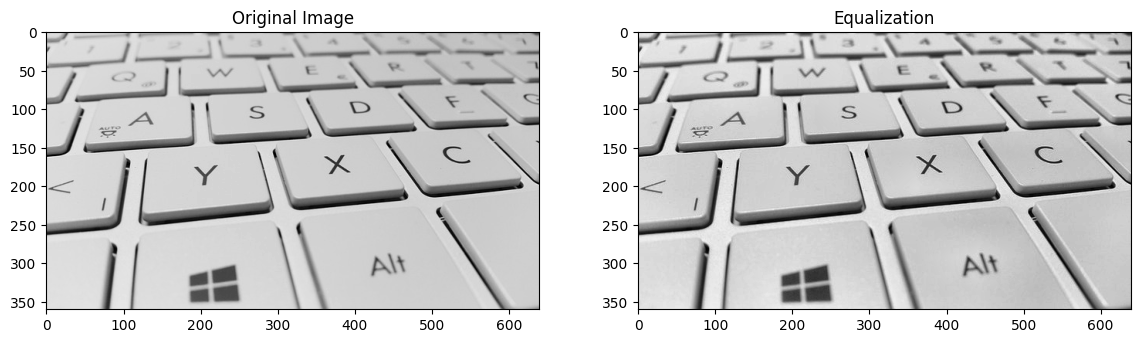

In [32]:
plt.figure(figsize=(14, 10))
plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(img2, 'gray')
plt.title('Equalization')

plt.show()

## 2D Histogram

- 지금까지 Histogram은 1차원으로 grayscale 이미지의 pixel의 강도, 즉 빛의 세기를 분석한 결과

- 2D Histogrm 은 Color 이미지의 Hue(색상) & Saturation(채도)을 동시에 분석하는 방법

- 색상과 채도를 분석하기 때문에 HSV Format으로 변환해야 함

- `cv2.calcHist()`

  - Parameters
    - `image` : HSV로 변환된 이미지

    - `channel` : 0-> Hue, 1-> Saturation

    - `bins` : [180,256] 첫번째는 Hue, 두번째는 Saturation

    - `range` : [0,180,0,256] : Hue(0~180), Saturation(0,256)



In [34]:
img = cv2.imread('./canal.jpg')
img.shape

(427, 640, 3)

In [35]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [36]:
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

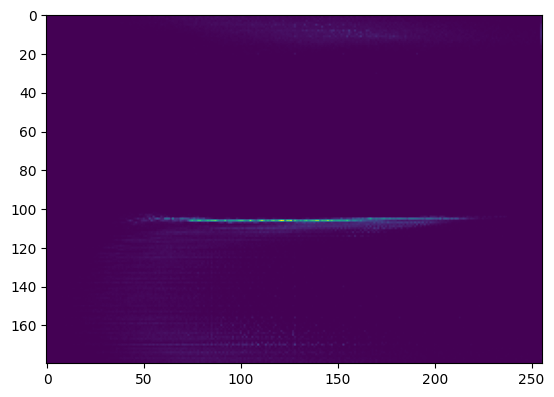

In [37]:
plt.imshow(hist)
plt.show()

- 위 Histogram을 보면 X축은 Saturation, Y축은 Hue값을 나타냄

- Y축을 보면 100근처에 값이 모여 있는 것을 알 수 있음
- HSV모델에서 H가 100이면 하늘색
- 이 이미지는 하늘색이 많이 분포되어 있다는 것을 2D Histogram을 통해서 알 수 있음
